<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

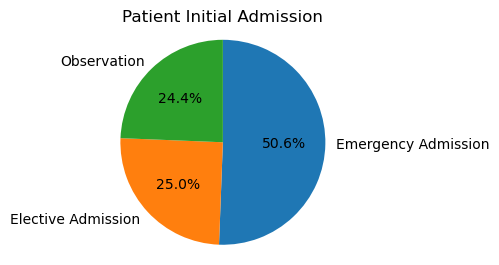

Emergency Admission: 50.60%
Elective Admission: 25.04%
Observation: 24.36%


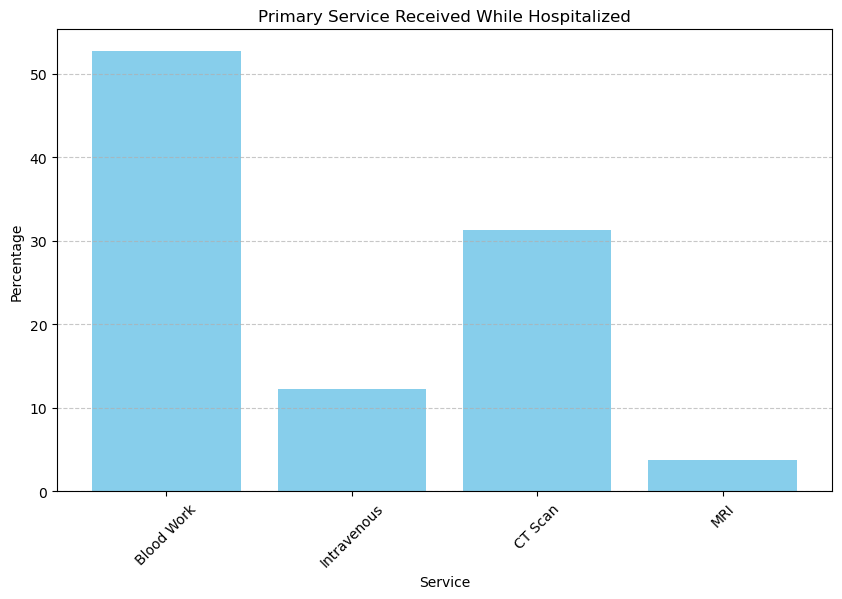

Blood Work: 52.65%
CT Scan: 31.30%
Intravenous: 12.25%
MRI: 3.80%


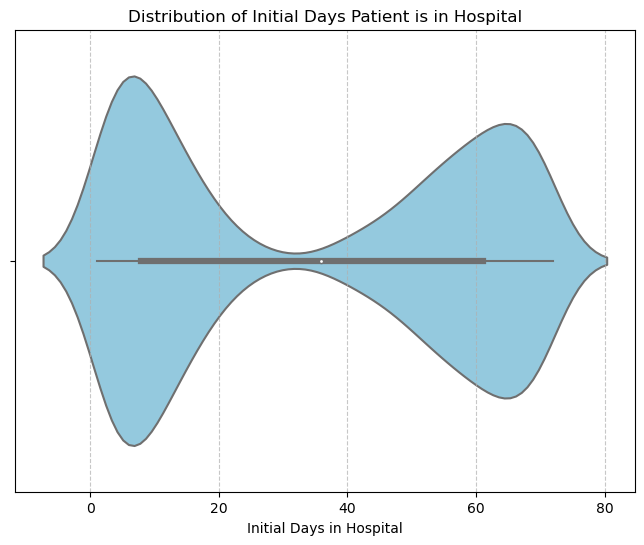

Summary statistics of 'Initial Days':
count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64


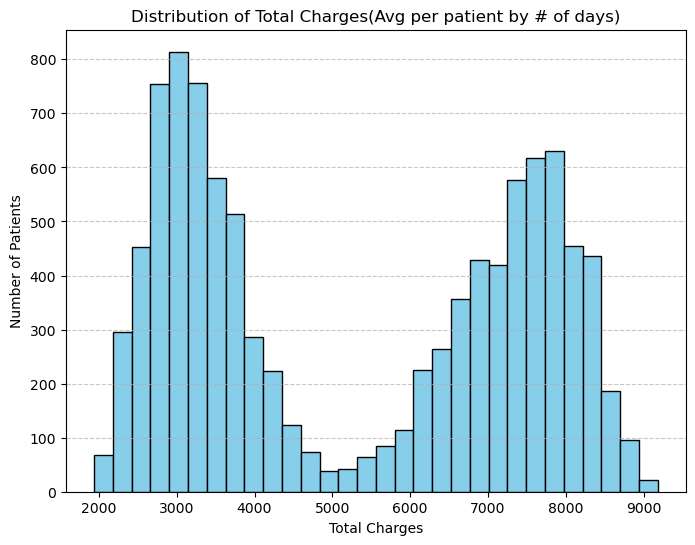

Summary statistics of 'Total Charges':
count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64


In [7]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Set file path and read file
file_path = "medical_clean.csv"
df = pd.read_csv(file_path, index_col=0)

# Display data types
df.info()

# Function to convert columns to bool
def convert_to_boolean(df, columns):
    for col in columns:
        try:
            df[col] = df[col].str.startswith('Yes')
        except AttributeError:
            print(f"{col}'not a string column. Next!")  
        df[col] = df[col].astype(bool)
    return df

# Function to convert category and assign numerics
def convert_to_category(df, column, categories, levels):
    df[column] = df[column].astype("category")
    df[column] = df[column].cat.set_categories(categories).cat.codes
    return df

# Convert columns to bool
boolean_columns = [
    'ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 
    'Diabetes', 'Hyperlipidemia','BackPain','Anxiety', 'Allergic_rhinitis', 
    'Reflux_esophagitis', 'Asthma'
]
df = convert_to_boolean(df, boolean_columns)

# Convert category and assign numerics
df = convert_to_category(df, "Marital", ['Divorced', 'Married', 'Never Married', 'Separated', 'Widowed'], range(5))
df = convert_to_category(df, "Gender", ['Female', 'Male', 'Nonbinary'], range(3))
df = convert_to_category(df, "Initial_admin", ['Elective Admission', 'Emergency Admission', 'Observation Admission'], range(3))
df = convert_to_category(df, "Complication_risk", ['High', 'Medium', 'Low'], range(3))
df = convert_to_category(df, "Services",['Blood Work', 'CT Scan', 'Intravenous', 'MRI'], range(4))

# Display dtypes after changes
df.info()

# Create a pivot table
pivot_table = pd.pivot_table(df, index='HighBlood', columns='ReAdmis', aggfunc='size', fill_value=0)
print(pivot_table)

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(pivot_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print(f"The p-value, or probability under the null hypothesis of obtaining a result as extreme as the one observed, is {p_value:.3f}.")


# Univariate categorical variable 1
# Percent by Initial Admission type
plt.subplot(1, 2, 1)
plt.title("Patient Initial Admission")
admin_percent = df["Initial_admin"].value_counts()
admin_labels = [ "Emergency Admission","Elective Admission", "Observation"]
plt.pie(admin_percent, labels=admin_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show()

# Mapping to numeric value
value_descriptions = {
  
    0: "Elective Admission",
    1: "Emergency Admission",
    2: "Observation"
}
value_counts = df['Initial_admin'].value_counts(normalize=True) * 100
# Get description from dictionary, default to "Unknown" if not found
for value, count in value_counts.items():
    description = value_descriptions.get(value, "Unknown")  
    print(f"{description}: {count:.2f}%")
#End Univariate categorical variable 1
    
    
# Univariate categorical variable 2
# Percent of patients recieving each service
service_percent = df["Services"].value_counts()
sample_size = len(df)
service_percentages = (service_percent / sample_size) * 100
custom_labels = {0: "Blood Work", 1: "Intravenous", 2: "CT Scan", 3: "MRI"}

plt.figure(figsize=[10, 6])
plt.bar(service_percentages.index, service_percentages, color='skyblue')
plt.title("Primary Service Received While Hospitalized")
plt.xlabel("Service")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ticks=service_percentages.index, labels=[custom_labels.get(i, '') for i in service_percentages.index])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mapping to numeric values
value_descriptions = {
    0: "Blood Work",
    1: "Intravenous",
    2: "CT Scan",
    3: "MRI",
}
# Info on services
value_counts = df['Services'].value_counts(normalize=True) * 100
for value, count in value_counts.items():
    description = value_descriptions.get(value, "Unknown")  
    print(f"{description}: {count:.2f}%")
#End Univariate categorical variable 2
    
# Univariate continuous varible 1
# Initial days in hospital
plt.figure(figsize=[8, 6])
sns.violinplot(data=df, x="Initial_days", color='skyblue') 
plt.title("Distribution of Initial Days Patient is in Hospital")
plt.xlabel("Initial Days in Hospital") 
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()

# Measures of Central Tendency	
print("Summary statistics of 'Initial Days':")
print(df['Initial_days'].describe())
#End Univariate continuous varible 1

# Univariate continuous varible 2
# Total Charges by number of patients
plt.figure(figsize=[8, 6])
plt.hist(df["TotalCharge"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Total Charges(Avg per patient by # of days)")
plt.xlabel("Total Charges")
plt.ylabel("Number of Patients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Measures of Central Tendency	
print("Summary statistics of 'Total Charges':")
print(df['TotalCharge'].describe())
#End Univariate continuous varible 2


Unique values of 'Complication_risk' and their counts:
Complication_risk
1    4517
0    3358
2    2125
Name: count, dtype: int64
Summary statistics of 'Additional_charges':
count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64


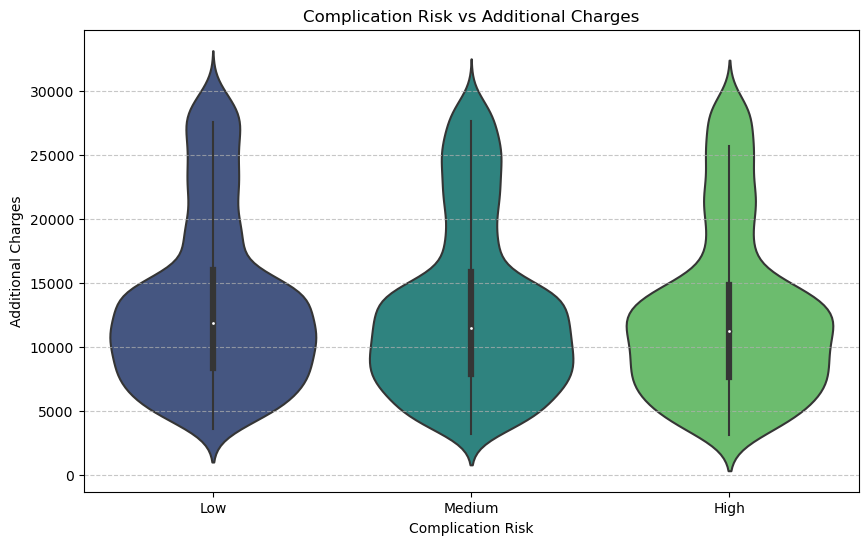

In [9]:


# Bivariate Statistic 1
# Complication Risk info
print("Unique values of 'Complication_risk' and their counts:")
print(df['Complication_risk'].value_counts())
# Mapping for Complication Risk categories
risk_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
df['Complication_risk'] = df['Complication_risk'].map(risk_mapping)
# Additional Charges info
print("Summary statistics of 'Additional_charges':")
print(df['Additional_charges'].describe())
# Create a violin plot for Additional Charges and Complication Risk
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Complication_risk', y='Additional_charges', order=['Low', 'Medium', 'High'], palette='viridis')
plt.xlabel('Complication Risk')
plt.ylabel('Additional Charges')
plt.title('Complication Risk vs Additional Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#End Bivariate Statistic 1

Summary statistics of 'Total Charges':
count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64
Unique values of 'Gender' and their counts:
Gender
0    5018
1    4768
2     214
Name: count, dtype: int64


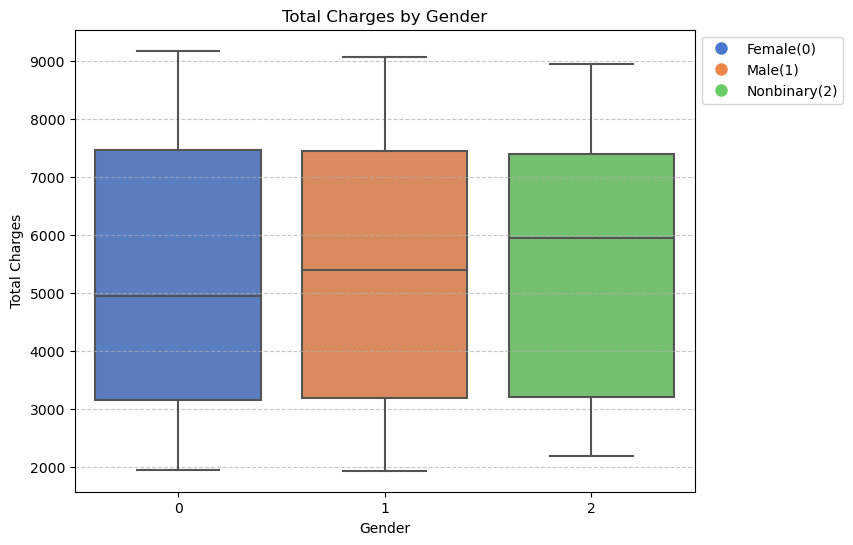

In [10]:

# Bivariate 2
# Measures of Central Tendency	
print("Summary statistics of 'Total Charges':")
print(df['TotalCharge'].describe())

# Gender info
print("Unique values of 'Gender' and their counts:")
print(df['Gender'].value_counts())


# Create a box plot for Total Charges and Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='TotalCharge', palette='muted')
plt.xlabel('Gender')
plt.ylabel('Total Charges')
plt.title('Total Charges by Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
legend_labels = ['Female(0)', 'Male(1)', 'Nonbinary(2)']
colors = sns.color_palette('muted')[:3]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                  for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
# End Bivariate 2